<a href="https://colab.research.google.com/github/ParkEunHyeok/Air-Care-System/blob/main/Simple_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 라이브러리 선언
import numpy as np
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt

In [1]:
from google.colab import files
myfile = files.upload()

Saving 6-2_Study_Time_Dataset.csv to 6-2_Study_Time_Dataset.csv


In [9]:
data = pd.read_csv(r'6-2_Study_Time_Dataset.csv')
df = pd.DataFrame(data, columns=['Study_time','point'])
print(df['point'])

0     81
1     85
2     93
3     91
4     97
5    100
Name: point, dtype: int64


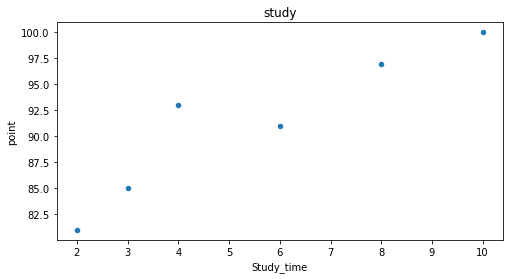

In [5]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)
df.plot(x='Study_time',y='point',
              kind='scatter', ax=ax, title="study")
plt.show()

In [56]:
temp = df.to_numpy()
print(temp)
W0s = df['point'].to_numpy()
W1s = df['Study_time'].to_numpy()

points = np.stack(np.meshgrid(W0s,W1s),axis=-1) # 가중치 조합 만들기
points = points.reshape(-1,2)
print("가중치 조합(w0, w1)의 갯수 : ", points.shape[0])

[[  2  81]
 [  3  85]
 [  4  93]
 [  6  91]
 [  8  97]
 [ 10 100]]
가중치 조합(w0, w1)의 갯수 :  36


In [99]:
def calculate_MSE(W0, W1):
    X = df.Study_time # 독립 변수, 보고싶어요 수
    y_true = df.point # 실제값

    y_pred = W1*X+W0 # 가중치 조합을 통한 예측값
    return ((y_true - y_pred)**2).mean() # MSE

In [100]:
losses = []
for W0, W1 in points:
    loss = calculate_MSE(W0, W1)
    losses.append(loss)
losses = np.array(losses)

In [101]:
# W0에 대한 미분식
def calculate_wo_derivative(w0,w1):
    x = df.Study_time # 독립 변수, 보고싶어요 수
    y_true = df.point # 실제값
    return (w1*x + w0 - y_true).mean()

# W1에 대한 미분식
def calculate_w1_derivative(w0,w1):
    x = df.Study_time # 독립 변수, 보고싶어요 수
    y_true = df.point # 실제값
    return ((w1*x + w0 - y_true)*x).mean()

In [102]:
w0 = -500
w1 = -0.75
mse = calculate_MSE(w0,w1)
dw0 = calculate_wo_derivative(w0,w1)
dw1 = calculate_w1_derivative(w0,w1)

dw0,dw1

(-595.2916666666666, -3297.125)

In [103]:
# 갱신된 weight와 mse 저장
w0_history = [w0]
w1_history = [w1]
mse_history = [mse]

alpha = 2e-10 # 학습률
epoch = 100 # 몇 번 학습할지 결정

for i in range(epoch):
    # 이전 가중치 가져오기
    old_w0 = w0_history[-1]
    old_w1 = w1_history[-1]
    
    # 미분값 갱신
    dw0 = calculate_wo_derivative(old_w0,old_w1)
    dw1 = calculate_w1_derivative(old_w0,old_w1)
    
    # 경사하강법을 통한 가중치 갱신
    new_w0 = old_w0 - alpha * dw0
    new_w1 = old_w1 - alpha * dw1
    new_mse = calculate_MSE(new_w0,new_w1)
    
    # 결과 저장
    w0_history.append(new_w0)
    w1_history.append(new_w1)
    mse_history.append(new_mse)

In [104]:
hist_df = pd.DataFrame({
    "W0":w0_history,
    "W1":w1_history,
    "Loss":mse_history
})

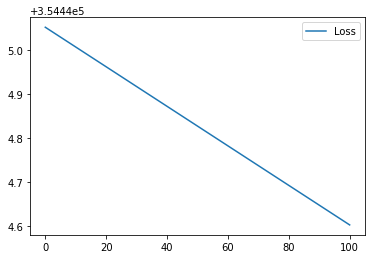

In [105]:
hist_df.plot(y='Loss')
plt.show()

In [106]:
hist_df.sort_values('Loss').iloc[0]

W0        -499.999988
W1          -0.749934
Loss    354444.603067
Name: 100, dtype: float64

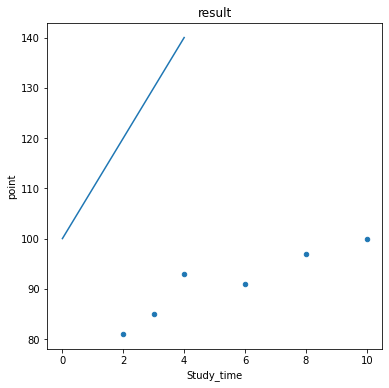

In [107]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
x = np.arange(0, 5)

y = W1 * x + W0

plt.plot(x, y)
df.plot(x='Study_time',y='point',
              kind='scatter', ax=ax, title="result")
plt.show()